# Week 2 - NumPy, matplotlib, and magma chambers

This week we'll start using some common Python packages that expand the capabilities of Python. One of the most commonly used Python packages is NumPy, an incredibly useful package for data handling and mathematical operations. In this notebook we'll learn how to use NumPy to handle large dataset, specifically chemical data of a intrusive igneous rock representing a 'frozen magma chamber'. In total, the dataset we'll be importing includes almost 18 million data points (1.8 million pixels each of which is associated with a estimated concentration for 10 different oxides)! Before we get to this, however, we'll start with a few simple exercises to demonstrate some of the key features of NumPy.

# Introduction to NumPy

**NumPy** (Numerical Python) is a fundamental library in Python for numerical computing. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on them.

## Key Features
- **N-Dimensional Arrays**: Provides the `ndarray` object, a powerful multi-dimensional array that is more efficient than Python lists.
- **Mathematical Operations**: Includes functions for linear algebra, statistics, Fourier transforms, and random number generation.
- **Performance**: Written in C, making operations on large datasets faster than using Python's built-in structures.
- **Broadcasting**: Enables operations on arrays of different shapes, simplifying mathematical computations.
- **Integration**: Works seamlessly with libraries like Pandas, Matplotlib, and SciPy.

## Why Use NumPy?
NumPy is the backbone of scientific computing in Python. It allows for efficient numerical computation and is widely used in data science, machine learning, and computational research. Its simplicity and speed make it a go-to choice for handling numerical data.




In [1]:
# In nearly all notebooks from this point onwards we will start with the following three lines of code
# This imports the three most commonly used Python packages: NumPy, Pandas, and Matplotlib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exercise 1 - Basic NumPy operations

Create 2 numpy varibles, a 1D array from 0 to 9 and a 3-by-3 matrix with values ranging from 0 to 8. **HINT** for the second variable you can use the function .reshape(3,3) on a NumPy array with 9 items.

(2 points)

From the first array extract all odd numbers.

(1 point)

Replace odd numbers in the 2D array with -1

(1 point)

Create 100 random numbers between 0 and 50. **HINT** use np.random.random().

(1 point)

## Exercise 2 - Load and inspect chemical data

We're now going to use another package called **pickle** to load in the data used for this assignment. **Pickle** is a built-in Python library used for serializing and deserializing Python objects. Serialization (also known as "pickling") converts a Python object into a byte stream, making it easier to save to a file or send over a network. Deserialization (or "unpickling") restores the original object from the byte stream. For large datasets (such as the one we'll be using) this can be extremely useful.

Step 1 - import the data


In [6]:
import pickle

In [7]:
with open('data/02c_quant.pkl', 'rb') as f:
    df = pickle.load(f)

In [8]:
df.tail()

,x,y,FeO,CaO,MnO,K2O,Na2O,Al2O3,MgO,TiO2,Cr2O3,SiO2
1789003,20757,24803,16.585241,-0.225589,0.357456,0.161749,-1.140060,-0.229231,46.633975,0.171159,0.450182,37.972156
1789004,20757,24820,14.468696,-0.348495,0.851124,0.099730,0.041635,0.787890,46.951913,0.025818,-0.044805,41.779153
1789005,20757,24837,14.818865,0.267207,-0.127850,0.180788,-1.273385,0.242796,45.334231,-0.623422,0.230072,39.243730
1789006,20757,24854,17.763164,0.618819,-0.301747,0.562768,0.310141,2.147267,37.276300,-0.236248,0.275865,35.353107
1789007,20757,24871,15.361918,0.017827,-0.066595,0.291468,-1.163193,0.597409,44.810022,0.481873,-0.295825,37.083181


You can hopefully see that there are 12 columns. X and Y coordinates of each point (unit is microns) and then the concentration of 10 different oxides at each datapoint. You can also see that the data is almost 1.8 million rows long! We'll lead more about Pandas next week, but for now we'll just say that, while Pandas are very useful, they are less efficient that NumPy arrays and thus are not preferred when deadling with such large datasets!

Now we can extract any of these columns from the dataframe above to create a single NumPy 1D array e.g. (if I did not include the .values command it would instead print a Pandas Series):

In [9]:
CaO = df['CaO'].values

In this sample we likely have three main mineral phases. Olivine (0 - 0.3 wt% CaO), Orthopyroxene (0 - 2.5 wt% CaO) and Clinopyroxene (>10 wt% CaO). In the cell below let's plot a histogram of the pixel CaO contents. Can we identify the three main mineral groups based on CaO alone? For most plotting in this course we will utilize matplotlib, the most widely used Python package for data plotting and visualization. In this notebook we'll examine a number of different matplotlib plots, starting with a histogram:

(3 points)

In [1]:
# Initialize a plot
plt.figure()

# plot the histogram - have a look here for ways to format your histogram https://matplotlib.org/stable/gallery/statistics/hist.html
plt.hist() # Enter your variable here. Also try and change the color and number of bins (kwarg "bins").

# Make sure to always add labels!
plt.xlabel('CaO (wt%)')
plt.ylabel('Count')
plt.title('Histogram of CaO contents')

Hopefully you can clearly see two peaks in the histogram, one at ~20 wt% (that's our clinopyroxenes) and one near 0 wt% which represents the olivine and orthopyroxene crystals as well as areas where there was no sample to analyze! In the following cell calculate how many pixels belong to clinopyroxenes and what proportion of the total map does this account for?

(2 points)

## Exercise 3 - reshape the chemical data (so it can be plotted as a map)!

We can continue to inspect the data as we have above, but ultimately it'll be more useful to have the data in the shape of the original chemical map (i.e., a 2D matrix rather than 1D arrays). We can do this with the code below that takes each column of the DataFrame and converts it into a 2D matrix. These matrices are then stored in a dictionary ('Data'):

In [13]:
# Initialize an empty dictionary. This is where we'll store the data
Data = {}

# work out the number of unique x and y variables. This will give us the number of x and y coordinates
n_rows = len(df['y'].unique())
n_cols = len(df['x'].unique())

# the product of the rows and columns should equal the length of the initial dataframe. If we've done everything correct this should print 'True'.
print(n_cols*n_rows == len(CaO))

True


In [14]:
# Loop through the data columns (excluding x and y)
for col in df.columns.difference(['x', 'y']):
    Data[col] = df[col].values.reshape((n_cols, n_rows))

The histogram plot above helps us to pick out the clinopyroxene data nicely. But doesn't give us any insights into the proportions of olivine, orthopyroxene or 'empty' analyses. Instead of a histogram create a x-y plot of SiO2 vs CaO.  Try using both standards plots (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and scatter plots (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

(5 points)

What you have hopefully just plotted is a graph that doesn't really show you anything! There are just far too many data points on here for us to extract anything of importance from this data. Let's have a think about how we can improve this situation.

First, let's try discarding any analyses that represent cracks/holes/gaps to any area where there isn't a crystal present. For each pixel that truly represents an olivine, clinopyroxene, or orthopyroxene crystal the sum of the different oxides should equal ~100 wt% (given the analytical uncertainties this is more likely 90 - 110 % in this case). Using a for loop, calculate the analytical total (sum of all oxides) for every pixel. Using this new variable plot only the pixels where the total is > 90 wt%. 

Does this improve the graph at all? What about if we set the opacity of the points to 0.01 (use alpha = 0.01 in the plot function).

(10 points)

This plot is, hopefully, now showing you the presence of at least 4, if not 5 different groups in our dataset. In a later lecture we'll discuss classification methods and talk about how we might do about splitting this data into different mineral groups. For now, we'll assume that anything with a CaO content > 15 wt% is a clinopyroxene. Do you think you can identify which minerals the other groups are associated with?

(2 points)

One graph is useful, but often we want to plot multiple variables against each other. This can be done in a variety of ways, e.g., scatter plots allow you to color the points by a third variable. Here we'll make use of subplots, an in-built component of matplotlib.pyplot that allows us to make a figure containing more than one graph. In the cell below plot both SiO2 vs CaO and SiO2 vs MgO. Try coloring the plots so that the clinopyroxene pixels (Ca > 15 wt%) are in red and all other pixels are in blue.

(10 points)

## Exercise 4 - Let's make some maps!

Now that we have the data nicely organized in an x-y grid we can plot up some chemical maps. In the cell below I do several different things. Make sure that you are able to understand what each line of code does.

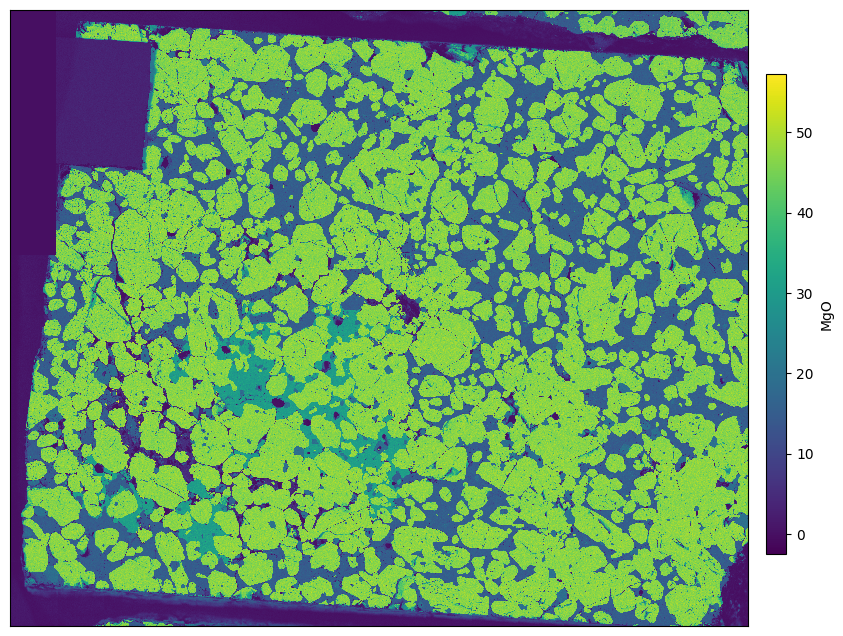

In [19]:
f = plt.figure(figsize = (10,8)) # create a figure (f) nominally 10 inches by 8 inches
a = f.add_subplot(111, aspect = "equal") # add an axes/subplot to this figure (a) with equal aspect ratio (one step in x is equal to a step in y)
a.get_xaxis().set_visible(False) # turn off the x axis labels
a.get_yaxis().set_visible(False) # turn off the y axis labels

# imshow - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
z1 = a.imshow(Data['MgO'], cmap = "viridis", interpolation = 'none', origin = 'lower')
cbaxes = f.add_axes([0.90, 0.2, 0.02, 0.6]) # create a new axes to place the colorbar in
cbar=plt.colorbar(z1, cax=cbaxes, label = "MgO") # put the colorbar in the new axes, based on the colors in the imshow plot.

Using the code above (as a template for how to create the maps), make plots for:
 1. The Al2O3 content of the sample - try using the vmin and vmax kwargs in imshow to adjust the lower and upper color limits
 2. The Al2O3 content of the clinopyroxene crystals - create a new NumPy array called 'Al2O3' and set all pixels that are not clinopyroxene to np.nan.
 3. The TiO2 content of the clinopyroxene crystals.

Do you see any zoning in the clinopyroxene Al or Ti contents? Based on the discussion in class would you classify the olivine or clinopyroxene as the 'cumulus' mineral?

(30 points)